## Train and test clustering model - Take 2

### Import libraries

In [477]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [478]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
from src.clustering import *
from src.classification import *

### Load data

In [479]:
# Load the data
df = pd.read_csv("../data/BankChurners_CleanedMapped.csv", index_col="ClientID")
df.head()

,Attrited,Age,Gender,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,RelationshipPeriod_InMonths,TotalProductNo,MonthsInactive_Last12Months,ContactNo_Last12Months,CreditLimit,TotalRevolvingBalance_CC,OpenToBuyAve_Last12Months,TransactionAmount_ChangeQ4overQ1,TotalTransactionAmount_Last12Months,TotalTransactionCount_Last12Months,TransactionCount_ChangeQ4overQ1,AveCardUtilizationRatio
ClientID,,,,,,,,,,,,,,,,,,,,
768805383,0,45,0,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,0,49,1,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,0,51,0,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,0,40,1,4,2,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,0,40,0,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Define some variables

In [480]:
column_names = list(df.columns)

### Reduce features w/ RF Classifier

In [481]:
X_train, X_test, y_train, y_test = clean_split_data(df, column_names)
X_train, X_test = scale_classification_data(X_train, X_test)

threshold = 0.02
important_features = fit_RF_classifier_and_reduce_features(X_train, y_train, column_names, threshold)
column_names_important_features = ["Attrited"] + list(important_features["Feature"])
df_reduced = df[column_names_important_features]
display(df_reduced.head())

,Attrited,TotalProductNo,MonthsInactive_Last12Months,ContactNo_Last12Months,TotalRevolvingBalance_CC,TransactionAmount_ChangeQ4overQ1,TotalTransactionAmount_Last12Months,TotalTransactionCount_Last12Months,TransactionCount_ChangeQ4overQ1,AveCardUtilizationRatio
ClientID,,,,,,,,,,
768805383,0,5,1,3,777,1.335,1144,42,1.625,0.061
818770008,0,6,1,2,864,1.541,1291,33,3.714,0.105
713982108,0,4,1,0,0,2.594,1887,20,2.333,0.000
769911858,0,3,4,1,2517,1.405,1171,20,2.333,0.760
709106358,0,5,1,0,0,2.175,816,28,2.500,0.000


### Prepare data

In [482]:
# Target df
df_target = df[["Attrited"]]
# Features df
df_data = df.drop(["Attrited"], axis=1)
display(df_data.shape)
# Fautures (reduced) df
df_data_reduced = df_reduced.drop(["Attrited"], axis=1)
display(df_data_reduced.shape)

(10127, 19)

(10127, 9)

### Train clustering...

#### Find optimal number of clusters

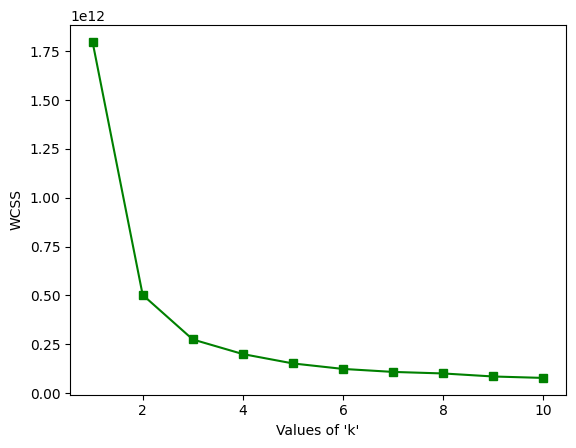

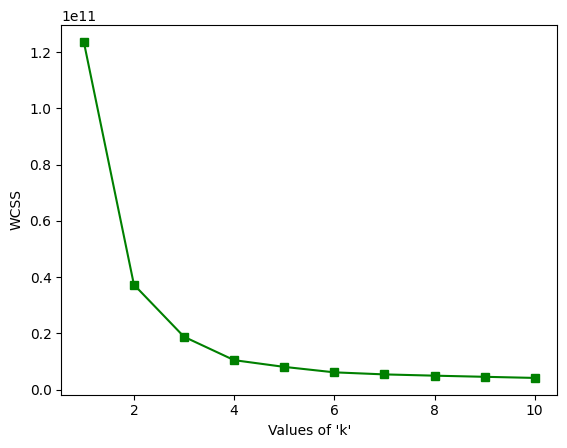

In [483]:
plot_elbow(df_data, False, False)
plot_elbow(df_data_reduced, False, False)


In [484]:
num_clusters = 4

#### ...with all features

In [485]:
model_all = train_kmeans(df_data, num_clusters, scale=False, zscore=False)

c:\Users\vital\Learning\GitHub\ChurnPrediction\_project_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


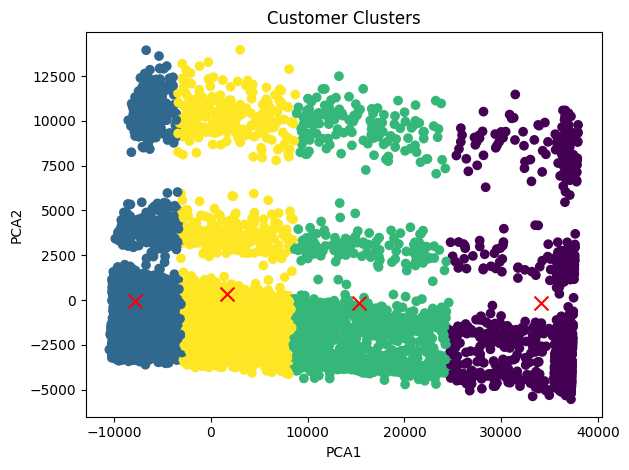

In [486]:
# plot results
df_data_pca, centers = apply_pca(df_data, model_all)
# Scatter plot
plot_clusters(df_data_pca, centers, model_all)

#### ...with reduced features

In [487]:
model_reduced = train_kmeans(df_data_reduced, num_clusters, scale=False, zscore=False)

c:\Users\vital\Learning\GitHub\ChurnPrediction\_project_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


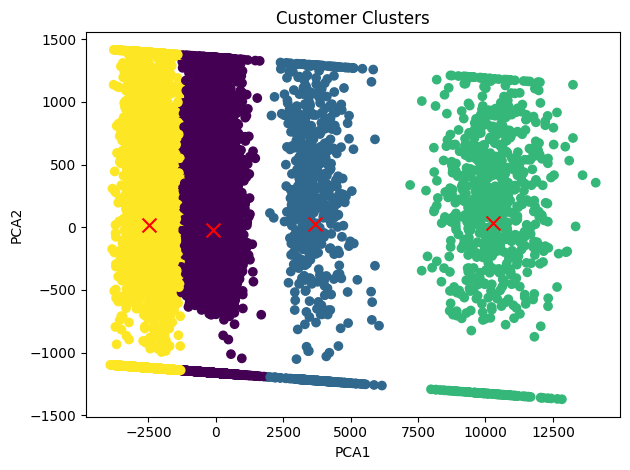

In [488]:
# plot results
df_data_reduced_pca, centers_mr = apply_pca(df_data_reduced, model_reduced)
# Scatter plot
plot_clusters(df_data_reduced_pca, centers_mr, model_reduced)

#### Check Clusters vs Attrited

#### All features model

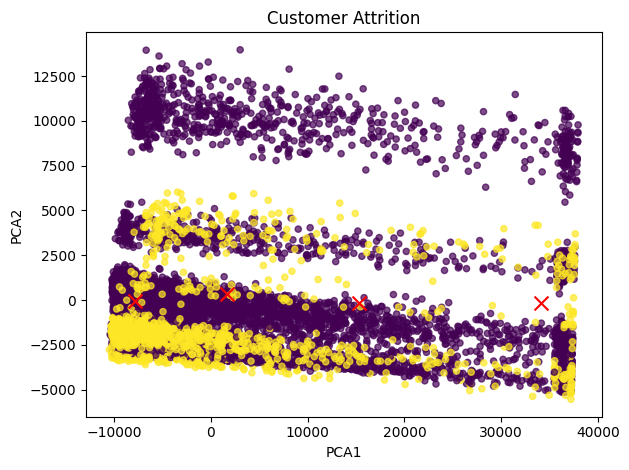

In [489]:
plt.scatter(df_data_pca['PCA1'], df_data_pca['PCA2'], c=df_target["Attrited"], alpha=0.7, s=20)
plt.scatter(centers[:,0], centers[:,1], marker='x', s=100, c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Attrition')
plt.tight_layout()
plt.show()

#### Reduced (important) features model

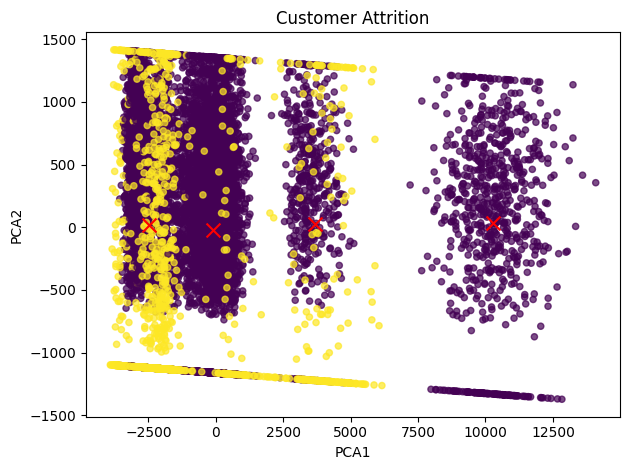

In [490]:
plt.scatter(df_data_reduced_pca['PCA1'], df_data_reduced_pca['PCA2'], c=df_target["Attrited"], alpha=0.7, s=20)
plt.scatter(centers_mr[:,0], centers_mr[:,1], marker='x', s=100, c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Attrition')
plt.tight_layout()
plt.show()

In [491]:
df_data_reduced_plus_clusters = df_data_reduced
df_data_reduced_plus_clusters["Cluster"] = model_reduced.labels_
df_data_reduced_plus_clusters_plus_attrited = df_data_reduced_plus_clusters.merge(df_target, on="ClientID")
df_data_reduced_plus_clusters_plus_attrited.head()

,TotalProductNo,MonthsInactive_Last12Months,ContactNo_Last12Months,TotalRevolvingBalance_CC,TransactionAmount_ChangeQ4overQ1,TotalTransactionAmount_Last12Months,TotalTransactionCount_Last12Months,TransactionCount_ChangeQ4overQ1,AveCardUtilizationRatio,Cluster,Attrited
ClientID,,,,,,,,,,,
768805383,5,1,3,777,1.335,1144,42,1.625,0.061,3,0
818770008,6,1,2,864,1.541,1291,33,3.714,0.105,3,0
713982108,4,1,0,0,2.594,1887,20,2.333,0.000,3,0
769911858,3,4,1,2517,1.405,1171,20,2.333,0.760,3,0
709106358,5,1,0,0,2.175,816,28,2.500,0.000,3,0


### Examine average values for clusters / attrited

In [492]:
count_by_cluster_attrition = pd.DataFrame(
    df_data_reduced_plus_clusters_plus_attrited.groupby("Cluster")[["Attrited"]].value_counts()
    )
display(count_by_cluster_attrition)

count
Cluster Attrited       
0       0          4584
        1           107
1       0           478
        1           221
2       0           747
3       0          2691
        1          1299

In [493]:
df_data_reduced_plus_clusters_plus_attrited.groupby(["Cluster", "Attrited"])[column_names_important_features[1:]].mean()

TotalProductNo  MonthsInactive_Last12Months  \
Cluster Attrited                                                
0       0               4.072426                     2.307373   
        1               2.906542                     2.691589   
1       0               1.782427                     2.177824   
        1               3.027149                     2.624434   
2       0               2.357430                     2.215529   
3       0               4.456708                     2.249721   
        1               3.353349                     2.705158   

                  ContactNo_Last12Months  TotalRevolvingBalance_CC  \
Cluster Attrited                                                     
0       0                       2.304756               1148.322208   
        1                       2.766355                707.439252   
1       0                       1.987448               1480.138075   
        1                       2.977376                746.253394   
2       0                       2.224900               1367.615797   
3       0                       2.546265               1370.535489   
        1                       2.988453                657.478830   

                  TransactionAmount_ChangeQ4overQ1  \
Cluster Attrited                                     
0       0                                 0.748129   
        1                                 0.827570   
1       0                                 0.749841   
        1                                 0.865131   
2       0                                 0.775229   
3       0                                 0.817312   
        1                                 0.654229   

                  TotalTransactionAmount_Last12Months  \
Cluster Attrited                                        
0       0                                 4307.161867   
        1                                 4770.981308   
1       0                                 7934.738494   
        1                                 8417.479638   
2       0                                14698.396252   
3       0                                 1875.896693   
        1                                 2051.461894   

                  TotalTransactionCount_Last12Months  \
Cluster Attrited                                       
0       0                                  74.537086   
        1                                  55.813084   
1       0                                  90.052301   
        1                                  70.389140   
2       0                                 110.336011   
3       0                                  43.319584   
        1                                  39.706697   

                  TransactionCount_ChangeQ4overQ1  AveCardUtilizationRatio  
Cluster Attrited                                                            
0       0                                0.749350                 0.324565  
        1                                0.557505                 0.123009  
1       0                                0.652464                 0.198743  
        1                                0.806602                 0.083946  
2       0                                0.750190                 0.180288  
3       0                                0.744482                 0.298038  
        1                                0.511219                 0.179086

### Class to pay attention to?

In [494]:
df_data_reduced_plus_clusters_plus_attrited["Status"] = \
    df_data_reduced_plus_clusters_plus_attrited["Attrited"]\
    .replace([0, 1], ["Cust", "Attr"]) + "/" + \
    df_data_reduced_plus_clusters_plus_attrited["Cluster"].replace([0, 1, 2, 3], ["C0", "C1", "C2", "C3"])

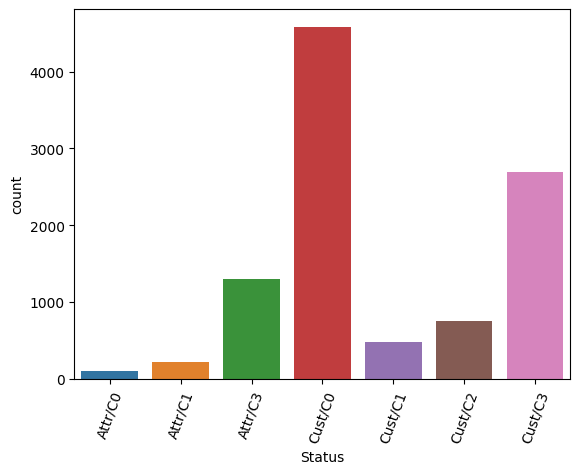

In [495]:
labels = sorted(list(df_data_reduced_plus_clusters_plus_attrited["Status"].unique()))
sns.countplot(
    x=df_data_reduced_plus_clusters_plus_attrited["Status"],
    order=labels
)
plt.xticks(rotation = 70)
plt.show()